In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FixedLocator
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter, FuncFormatter, FixedLocator
from matplotlib.lines import Line2D

In [15]:
#PSNR values of the bulldozer images obtained during 3 rounds of experiments by Nerfacto
round_1_bulldozer = [8.589889526367188, 16.347143173217773, 17.73064422607422, 18.22532081604004, 19.79175567626953, 19.67475128173828, 19.878862380981445, 19.10670280456543, 20.041318893432617]
round_2_bulldozer = [8.590093612670898, 15.930194854736328, 18.34764862060547, 18.695533752441406, 19.56327247619629, 19.283245086669922, 19.727678298950195, 18.956056594848633, 19.247360229492188]
round_3_bulldozer = [9.212156295776367, 15.930194854736328, 17.630878448486328, 18.59825325012207, 19.779857635498047, 19.283245086669922, 19.645156860351562, 19.445701599121094, 19.741209030151367]
psnr_dict_bulldozer = {'Round 1': round_1_bulldozer, 'Round 2': round_2_bulldozer, 'Round 3' : round_3_bulldozer}
psnr_values_bulldozer = pd.DataFrame(data=psnr_dict_bulldozer, index =[1, 2, 4, 6, 8, 16, 32, 64, 128])
psnr_values_bulldozer['average'] = psnr_values_bulldozer.mean(axis=1)
psnr_values_bulldozer.to_csv("psnr_bulldozer_by_nerfstudio.csv")

#Standard deviations of the bulldozer images obtained during 3 rounds of experiments by Nerfacto
std_div_round_1_bulldozer = [1.3735744953155518, 2.638042688369751, 2.483311176300049, 3.4103124141693115, 3.3926987648010254, 2.7158751487731934, 3.714247703552246, 3.9836509227752686, 3.2945916652679443]
std_div_round_2_bulldozer = [1.503994107246399, 2.369044065475464, 2.5207138061523438, 3.320277452468872, 2.8551583290100098, 3.1131184101104736, 3.283252477645874, 4.21942663192749, 3.908723831176758]
std_div_round_3_bulldozer = [1.0388485193252563, 2.369044065475464, 2.260908603668213, 3.039440631866455, 2.733090877532959, 3.1131184101104736, 3.941894054412842, 3.7887401580810547, 3.330806016921997]

#To obtain the standard deviation from 3 experiments we use the following formula: ((std_div_1 ^ 2 + std_div_3 ^ 2 + std_div_3 ^ 2) / 3) ^ (1 / 2)
std_div_final_bulldozer = []
for i in range (0, 9):
  std_div_final_bulldozer.append(((std_div_round_1_bulldozer[i] ** 2 + std_div_round_2_bulldozer[i] ** 2 + std_div_round_3_bulldozer[i] ** 2) / 3) ** (1 / 2))
print(std_div_final_bulldozer)

[1.3200898220597899, 2.461978120264958, 2.424358348443612, 3.260504688860875, 3.0073310280740913, 2.986580558345466, 3.6566793484219264, 4.0011493249733165, 3.522628041279498]


In [16]:
#PSNR values of the wheel images obtained during 3 rounds of experiments by Nerfacto
round_1_wheel = [12.313313484191895, 13.671502113342285, 17.9876651763916, 15.304448127746582, 18.237499237060547, 17.1630802154541, 17.389074325561523, 18.198293685913086, 16.29186248779297]
round_2_wheel = [12.144606590270996, 13.724095344543457, 18.438884735107422, 15.142380714416504, 18.201915740966797, 17.6131858825683, 17.355234146118164, 17.8895320892334, 16.015380859375]
round_3_wheel = [12.472275733947754, 13.776108741760254, 18.375385284423828, 15.31791877746582, 18.297351837158203, 17.36090660095215, 17.79737663269043, 17.595638275146484, 16.05812644958496]
psnr_dict_wheel = {'Round 1': round_1_wheel, 'Round 2': round_2_wheel, 'Round 3' : round_3_wheel}
psnr_values_wheel = pd.DataFrame(data=psnr_dict_wheel, index =[1, 2, 4, 6, 8, 16, 32, 64, 128])
psnr_values_wheel['average'] = psnr_values_wheel.mean(axis=1)

#Standard deviations of the wheel images obtained during 3 rounds of experiments by Nerfacto
std_div_round_1_wheel = [2.056464672088623, 3.0200483798980713, 3.7601590156555176, 3.5632917881011963, 4.567529201507568, 5.787837982177734, 5.349503040313721, 4.855507850646973, 4.950389862060547]
std_div_round_2_wheel = [1.938681960105896, 2.8344297409057617, 3.698568344116211, 3.3687808513641357, 4.472907543182373, 5.943122863769531, 5.800142288208008, 4.8196187019348145, 5.213188171386719]
std_div_round_3_wheel = [2.213372230529785, 2.8989369869232178, 3.810953378677368, 3.3602981567382812, 4.596724033355713, 5.963912487030029, 5.495406150817871, 4.738166332244873, 5.71688985824585]

#To obtain the standard deviation from 3 experiments we use the following formula: ((std_div_1 ^ 2 + std_div_2 ^ 2 + std_div_3 ^ 2) / 3) ^ (1 / 2)
std_div_final_wheel = []
for i in range (0, 9):
  std_div_final_wheel.append(((std_div_round_1_wheel[i] ** 2 + std_div_round_2_wheel[i] ** 2 + std_div_round_3_wheel[i] ** 2) / 3) ** (1 / 2))
print(std_div_final_wheel)

print(psnr_values_wheel)
psnr_values_wheel.to_csv("psnr_wheel_by_nerfstudio.csv")



[2.0725629319652357, 2.918819386167835, 3.756841282849483, 3.432071118816634, 4.546027450251195, 5.898814288616317, 5.551525979531258, 4.80468178314142, 5.3030343624505045]
       Round 1    Round 2    Round 3    average
1    12.313313  12.144607  12.472276  12.310065
2    13.671502  13.724095  13.776109  13.723902
4    17.987665  18.438885  18.375385  18.267312
6    15.304448  15.142381  15.317919  15.254916
8    18.237499  18.201916  18.297352  18.245589
16   17.163080  17.613186  17.360907  17.379058
32   17.389074  17.355234  17.797377  17.513895
64   18.198294  17.889532  17.595638  17.894488
128  16.291862  16.015381  16.058126  16.121790


In [13]:
#Writing down mean and standard deviation to the files
mean_psnr_dict = {"Whole reconstructed wheel compared to original wheel": psnr_values_wheel['average'], "Whole reconstructed bulldozer compared to original bulldozer": psnr_values_bulldozer['average']}
mean_psnr = pd.DataFrame(data = mean_psnr_dict, index=[1, 2, 4, 6, 8, 16, 32, 64, 128])
mean_psnr.to_csv("mean_psnr_by_nerfstudio.csv")
mean_psnr

std_div_dict = {"Whole reconstructed wheel compared to original wheel": std_div_final_wheel, "Whole reconstructed bulldozer compared to original bulldozer": std_div_final_bulldozer}
std_div = pd.DataFrame(data = std_div_dict, index=[1, 2, 4, 6, 8, 16, 32, 64, 128])
std_div.to_csv("std_div_psnr_by_nerfstudio.csv")
std_div

,Whole reconstructed wheel compared to original wheel,Whole reconstructed bulldozer compared to original bulldozer
1,2.072563,1.320090
2,2.918819,2.461978
4,3.756841,2.424358
6,3.432071,3.260505
8,4.546027,3.007331
16,5.898814,2.986581
32,5.551526,3.656679
64,4.804682,4.001149
128,5.303034,3.522628


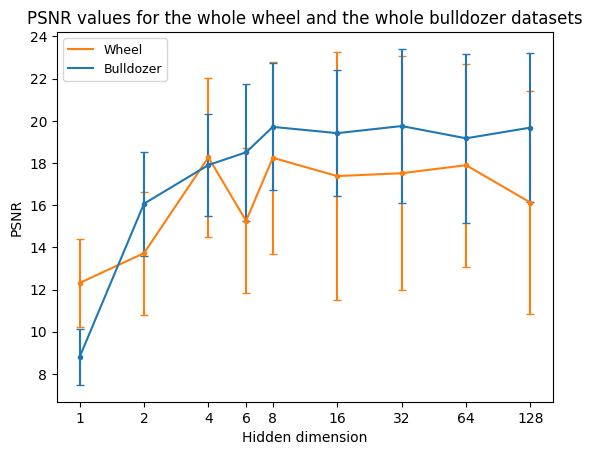

In [12]:
#Making the plot of the average PSNR values and standard deviatios for wheel and bulldozer
plt.title('PSNR values for the whole wheel and the whole bulldozer datasets')
plt.xlabel('Hidden dimension')
plt.ylabel('PSNR')
plt.xscale("log", base=2)

def format_ticks(value, pos):
    if value.is_integer():
        return str(int(value))
    else:
        return str(value)

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

custom_ticks = [1, 2, 4, 6, 8, 16, 32, 64, 128]
plt.xscale("log", base=2)
plt.xticks(custom_ticks)

c1 = "tab:orange"
c2 = "tab:blue"

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.errorbar(mean_psnr.index, mean_psnr['Whole reconstructed wheel compared to original wheel'], yerr=std_div_final_wheel, c=c1, capsize=3, fmt='.-')
plt.errorbar(mean_psnr.index, mean_psnr['Whole reconstructed bulldozer compared to original bulldozer'], yerr=std_div_final_bulldozer, c=c2, capsize=3, fmt='.-')

plt.legend(
    loc="upper left",
    handles=[
        Line2D([], [], c=c1, label="Wheel"),
        Line2D([], [], c=c2, label="Bulldozer")
    ], fontsize="9"
)

plt.savefig("psnr_by_nerfstudio_plot.png")